## Descriptive & Inferential Statistics Tutorial

Create a small vector called familyAges:

In [2]:
familyAges <- c(43,43,12,8,5)

### 1. Measuring central tendency (aka mean & median) and spread (aka standard deviation)
We can ask R to return statistical measures by simply calling their respective functions on our tiny vector:

In [3]:
mean(familyAges)
median(familyAges)
sd(familyAges)

[1] 22.2

[1] 12

[1] 19.14941

But what if we wanted to automate this by creating a function which takes in a numerical vector as an input and outputs these measures into a list of variables? Here is how to do it:

Start by thinking of a name for your function. Here, we’ll call it **userStats**. Next, tell R userStats is a function which takes a single argument in the form of a numeric vector with function(numVec). We are ready to define the body of the function which consists of 2 actions: 

1) create a vector called **statsList** which is a list of the concatenated measures of the mean, median, and sd of your **numVec** input, and 

2) tell R you want it to output **statsList** when it is done running the function.


In [4]:
userStats <- function(numVec){
  statsList <- c(mean(numVec),
                 median(numVec),
                 sd(numVec))
  return(statsList)
}

We are ready to test the function on our small vector:

In [5]:
userStats(familyAges)

[1] 22.20000 12.00000 19.14941

We can use our function on any numerical data we want. For instance, we can try it out with the numbers from 1 to 10 using the : sign to denote a range of numbers:

In [6]:
userStats(1:10)

[1] 5.50000 5.50000 3.02765

### 2. Displaying the shape of your data’s distribution graphically using a histogram 

**Histogram** – graphical representation of data using bars to signify different ranges of data. The higher a bar, the more observations fall into that range. 

Let’s plot the distribution of our familyAges vector using a histogram:

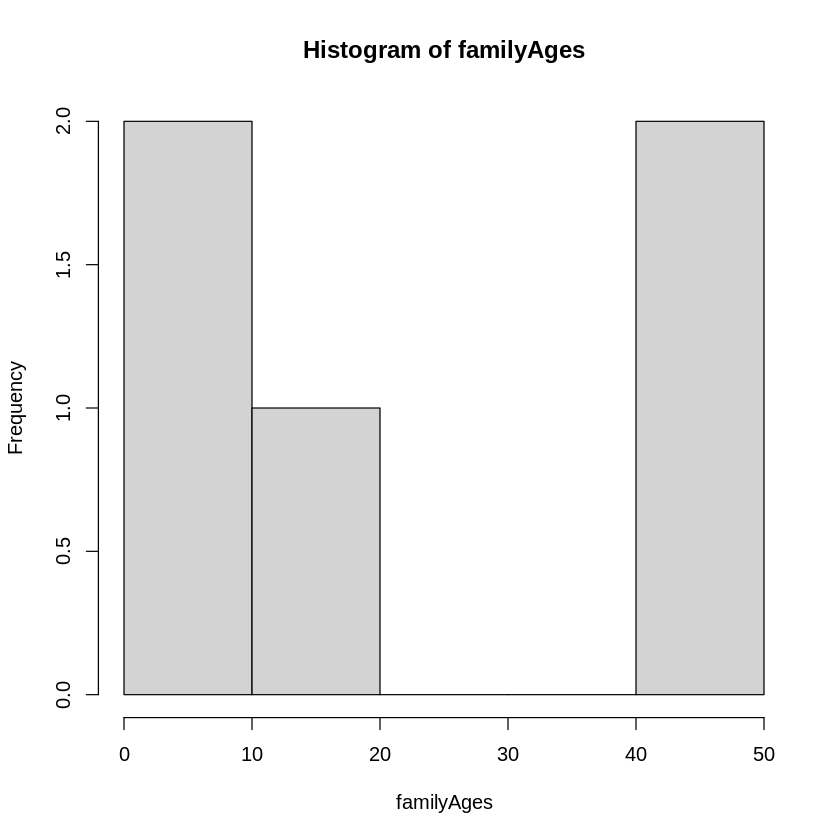

In [7]:
hist(familyAges)

We have a total of 5 family members. The y-axis shows how many of them fall into each range, where 1 range spans 10 years and we have 5 ranges: 0-10, 10-20, 20-30, 30-40, and 40-50 years.

I can see that for the first range, 0-10, the y-axis indicates 2.0, i.e. there are 2 family members in that age range (think back to the data – there is a 5-year old family member and an 8-year old one.) There are also 2 family members in the 40-50 range (43, 43), and 1 in the 10-20 range (8 years old). There are no family members between the ages of 20-40 because the height of the bars for these 2 ranges is 0. 

Histograms are also good to **predict the probability** of drawing a member of this dataset at random. 100%/5 members = 20%, so there is a 20% chance to draw someone from the 10-20-year range; 40% of drawing someone from the 0-10 or 40-50 year ranges, and 0% from 20-30 and 30-40 years.


We can try out the hist() function on bigger data, too. For this example, we'll use the built-in **mtcars** dataset:

[1] 32 11

[1] 20.090625 19.200000  6.026948

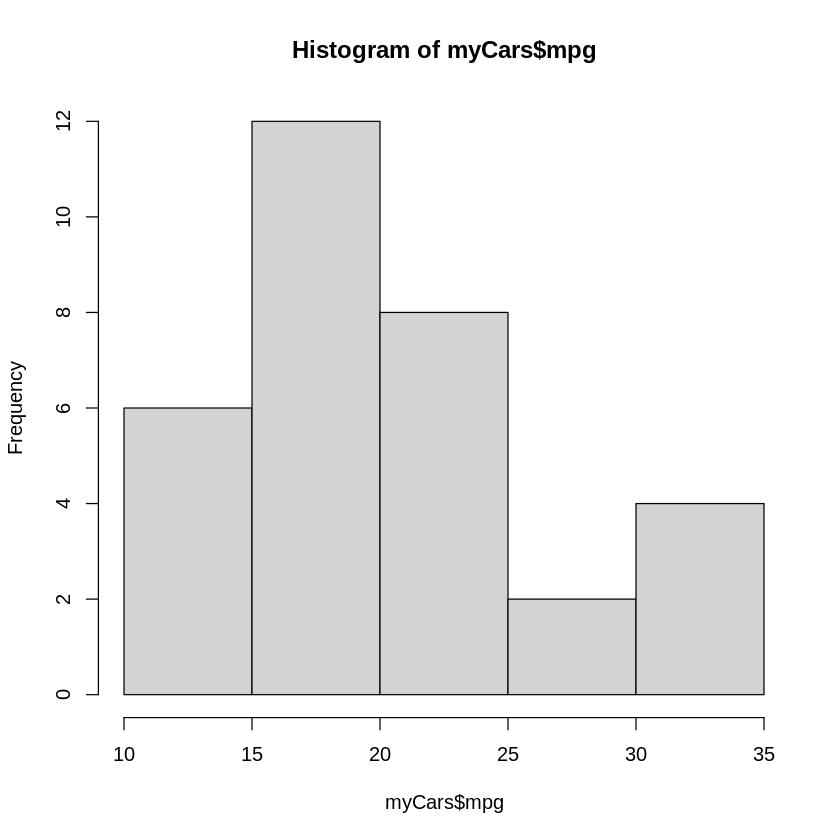

In [24]:
myCars <- mtcars
dim(myCars)
userStats(myCars$mpg)
hist(myCars$mpg)

Sometimes, we want to see how the actual distribution of our data compares to a **“normal distribution”** with the same properties, i.e. **same number of observations**, **same mean**, and **same standard deviation**. 

For **myCars** this synthetic normal distribution looks like this:

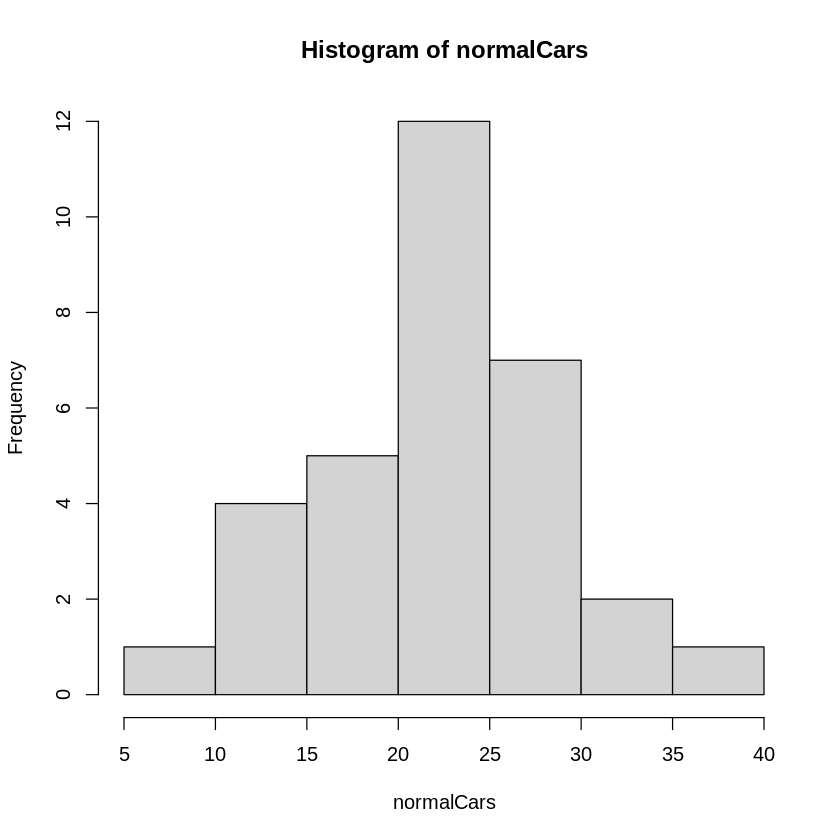

In [58]:
normalCars <- rnorm(32, 20.9, 6.03)
hist(normalCars)

### 3. Sampling

As we said in class, a lot of statistics is about drawing conclusions about a population based on just a subset of available data (a **sample**). If you think about it, our car data is just that – a small sample, a snapshot, of a much larger universe of data which includes all cars in the world. 

However, for the sake of this exercise, let’s pretend that our car vector is the whole population we are interested in. And that for some reason, we don’t have access to all its records. Only to a small sample. A sample of 4 observations. How can we ask R to provide us with such a sample?

This tells R we want 4 observations from our myCars vector:


In [114]:
sample(myCars$mpg, size=4)

[1] 30.4 15.0 19.2 16.4

We can even call our **userStats()** function on a sample like this:

In [115]:
userStats(sample(myCars$mpg, size=4))

[1] 18.525000 18.200000  7.387095

We can obtain 5 different samples of size 4 and read their mean, median, and sd stats all at once with the **replicate()** function:

In [116]:
replicate(5, userStats(sample(myCars$mpg, size=4)))

21.75000,18.875000,19.77500,21.725000,23.550000
23.10000,17.350000,18.30000,20.900000,23.500000
10.22855,8.488178,5.80596,7.702543,8.654286


Let’s store these stats in a table called **values** and take a look at it. Each column contains the mean, median, and sd values of a particular sample. We have 10 columns because we asked R for 10 samples:

In [152]:
values <- replicate(5, userStats(sample(myCars$mpg, size=4)))

**Question:** How can we plot a histogram of only the means of our 10 samples?

**Answer:** Recall that the means are stored in the first row of the table named values – they appear first in our statsList for each sample. So we can use subsetting to get to them.

This tells R we want all the columns of the **values** table (i.e. all 10 samples) but only the first row of each (i.e. the mean – we don’t care about the median and sd):

In [139]:
values[1,]

[1] 20.375 22.550 22.875 14.800 20.175

Plot the means of our 10 samples:

[1] 18.66

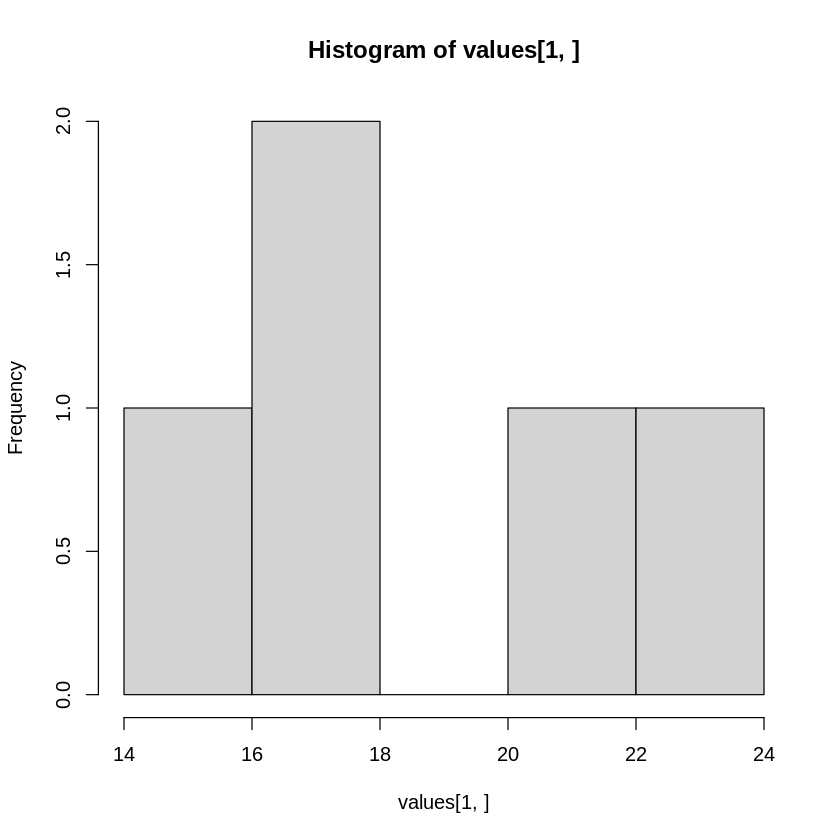

In [153]:
hist(values[1,])
mean(values[1,])

What if we increase the number of replications so that instead of just 5 samples, we ask R for 100 samples?

In [181]:
values <- replicate(100, userStats(sample(myCars$mpg, size=25)))

Plot your new means and you will discover an important law in statistics – **the Law of Large Numbers**: as number of samples increases, the mean of our sample means gets closer and closer to the actual mean of the population which we know to be 20.09. In fact, they form a normal distribution centered on or very close to the population mean.

[1] 20.13708

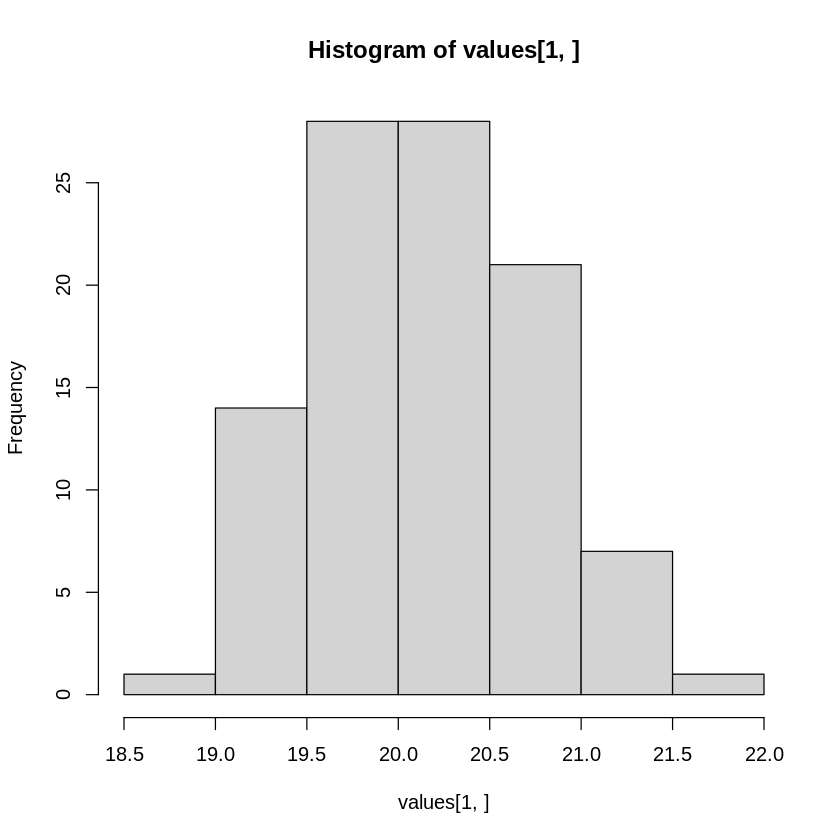

In [182]:
hist(values[1,])
mean(values[1,])